In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from convert_to_num import ConvertToNum
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt  # 导入图形展示库
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# 变量缩写替换字典
my_dict = {'carid':'Carid','tradeTime':'trt', 'tradeTime_from_now':'tr_f_n', 'tradeTime_q':'trt_q', 'cityId': 'cid', 'transferCount':'transferCount', 'seatings':'seatings', 'registerDate':'rdate','registerDate_from_now':'rdate_f_n','registerDate_q':'rdate_q','licenseDate':'ldate', 'licenseDate_from_now':'ldate_f_n', 'licenseDate_q':'ldate_q', 'anonymousFeature1':'ayf1', 'anonymousFeature2':'ayf2', 'anonymousFeature3':'ayf3', 'anonymousFeature4':'ayf4', 'anonymousFeature5':'ayf5', 'anonymousFeature6':'ayf6', 'anonymousFeature7':'ayf7', 'anonymousFeature8':'ayf8', 'anonymousFeature9':'ayf9', 'anonymousFeature10':'ayf10', 'anonymousFeature11':'ayf11', 'anonymousFeature12':'ayf12', 'anonymousFeature13':'ayf13', 'anonymousFeature14':'ayf14', 'anonymousFeature15':'ayf15','anonymousFeature7_from_now':'ayf7_f_n', 'anonymousFeature7_q':'ayf7_q', 'anonymousFeature13_m':'ayf13_m', 'updatePriceTimeJson':'udpt_json', 'updatePriceCount':'udpc', 'updatePricePeriod':'udpp', 'updatePricePeriodFirst':'udppf', 'updatePriceRange':'udpr', 'updatePriceVariance':'udpv'}

# 数据读取

In [3]:
df1 = pickle.load(open('./data/df1.pkl', 'rb'))
df1

,index,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,...,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,anonymousFeature7_from_now,anonymousFeature15_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature7_q,anonymousFeature13_m
0,0,1,2021-06-28,1,1,1,4.01,1,1,1.0,...,206.0,1511.0,1455.0,NaN,NaN,2,4,1,4.0,9.0
1,1,2,2021-06-25,2,2,2,8.60,1,2,1.0,...,209.0,1876.0,1766.0,NaN,NaN,2,4,1,4.0,9.0
2,2,5,2021-06-19,5,5,5,15.56,1,2,3.0,...,215.0,5102.0,5076.0,NaN,NaN,2,1,1,1.0,8.0
3,3,6,2021-06-29,6,6,6,6.04,1,3,1.0,...,205.0,1998.0,1959.0,1251.0,NaN,2,3,3,3.0,8.0
4,4,7,2021-06-30,7,7,7,5.70,4,1,2.0,...,204.0,3459.0,3432.0,487.0,NaN,2,3,3,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,...,239.0,5467.0,5415.0,NaN,NaN,2,1,1,1.0,2.0
29996,29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,...,596.0,3612.0,3543.0,850.0,NaN,2,1,2,3.0,1.0
29997,29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,...,480.0,3703.0,3639.0,NaN,NaN,3,4,1,1.0,4.0
29998,29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,...,437.0,2120.0,2074.0,560.0,NaN,4,2,2,3.0,8.0


# 分类变量和数值型变量

In [4]:
# 数值型变量列表columns_to_normalize， 分类变量列表cate_columns
columns_to_normalize = ['tradeTime_from_now', 'registerDate_from_now', 'licenseDate_from_now', 'mileage', 'transferCount', 'seatings', 'displacement', 'newprice', 'anonymousFeature2', 'anonymousFeature3', 'anonymousFeature5', 'anonymousFeature6', 'anonymousFeature14']
cate_columns = ['brand','tradeTime_q', 'registerDate_q', 'licenseDate_q', 'serial', 'model', 'color', 'cityId', 'carCode','country', 'maketype', 'modelyear', 'gearbox','oiltype', 'anonymousFeature11', 'anonymousFeature12']
# data_columns，模型预测使用到的所有变量
data_columns = []

In [5]:
data_columns.extend(columns_to_normalize)
data_columns.extend(cate_columns)
data_columns.append('price')  # 模型预测使用到的所有数据

# 查看是否有缺失值

In [6]:
# 查看是否有缺失值
data = df1[data_columns]
data.isnull().any()

tradeTime_from_now       False
registerDate_from_now    False
licenseDate_from_now     False
mileage                  False
transferCount            False
seatings                 False
displacement             False
newprice                 False
anonymousFeature2        False
anonymousFeature3        False
anonymousFeature5        False
anonymousFeature6        False
anonymousFeature14       False
brand                    False
tradeTime_q              False
registerDate_q           False
licenseDate_q            False
serial                   False
model                    False
color                    False
cityId                   False
carCode                  False
country                  False
maketype                 False
modelyear                False
gearbox                  False
oiltype                  False
anonymousFeature11       False
anonymousFeature12       False
price                    False
dtype: bool

In [7]:
data.shape

(30000, 30)

In [8]:
data

,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,mileage,transferCount,seatings,displacement,newprice,anonymousFeature2,anonymousFeature3,...,cityId,carCode,country,maketype,modelyear,gearbox,oiltype,anonymousFeature11,anonymousFeature12,price
0,206.0,1511.0,1455.0,4.01,0,5,1.5,6.88,1,1,...,1,1.0,779413.0,1.0,2017.0,1.0,1,1,4220*1740*1625,4.24
1,209.0,1876.0,1766.0,8.60,0,5,1.2,11.98,2,2,...,2,1.0,779415.0,2.0,2017.0,2.0,1,1+2,4630*1775*1480,7.38
2,215.0,5102.0,5076.0,15.56,0,5,1.6,12.78,2,2,...,2,3.0,779411.0,3.0,2008.0,4.0,1,1+2,4515*1725*1445,1.00
3,205.0,1998.0,1959.0,6.04,3,5,1.3,9.49,5,2,...,3,1.0,779413.0,1.0,2016.0,2.0,1,1,4500*1834*1707,4.38
4,204.0,3459.0,3432.0,5.70,2,5,2.0,18.08,5,2,...,1,2.0,779415.0,2.0,2012.0,5.0,1,1,4315*1783*1606,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,239.0,5467.0,5415.0,10.38,0,5,1.8,11.86,14,2,...,35,3.0,779413.0,1.0,2006.0,6.0,1,1,4295*1705*1570,0.88
29996,596.0,3612.0,3543.0,11.69,2,5,2.0,20.28,6,2,...,1,2.0,779415.0,2.0,2012.0,22.0,1,1+2,4960*1845*1480,8.30
29997,480.0,3703.0,3639.0,9.87,0,5,1.6,14.58,2,2,...,1,2.0,779415.0,2.0,2009.0,4.0,1,1,4665*1700*1510,5.00
29998,437.0,2120.0,2074.0,9.57,1,5,2.5,35.40,8,2,...,1,1.0,779415.0,3.0,2015.0,25.0,2,3+2,4915*1820*1450,28.00


# 分类变量转化为数值

In [9]:
from convert_to_num import ConvertToNum
# # 将分类变量替换为数值型
convert_to_num = pickle.load(open('./convert_to_num.pkl', 'rb'))
data[cate_columns] = data[cate_columns].apply(convert_to_num.transform)
data

D:\Users\JS\Anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,mileage,transferCount,seatings,displacement,newprice,anonymousFeature2,anonymousFeature3,...,cityId,carCode,country,maketype,modelyear,gearbox,oiltype,anonymousFeature11,anonymousFeature12,price
0,206.0,1511.0,1455.0,4.01,0,5,1.5,6.88,1,1,...,4,9524,9530,9524,9541,9524,4,4,9598,4.24
1,209.0,1876.0,1766.0,8.60,0,5,1.2,11.98,2,2,...,5,9524,9531,9526,9541,9526,4,9594,9599,7.38
2,215.0,5102.0,5076.0,15.56,0,5,1.6,12.78,2,2,...,5,9525,9538,9525,9542,9527,4,9594,9600,1.00
3,205.0,1998.0,1959.0,6.04,3,5,1.3,9.49,5,2,...,44,9524,9530,9524,9543,9526,4,4,9601,4.38
4,204.0,3459.0,3432.0,5.70,2,5,2.0,18.08,5,2,...,4,9526,9531,9526,9544,9528,4,4,9602,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,239.0,5467.0,5415.0,10.38,0,5,1.8,11.86,14,2,...,70,9525,9530,9524,9545,9529,4,4,11614,0.88
29996,596.0,3612.0,3543.0,11.69,2,5,2.0,20.28,6,2,...,4,9526,9531,9526,9544,9570,4,9594,9989,8.30
29997,480.0,3703.0,3639.0,9.87,0,5,1.6,14.58,2,2,...,4,9526,9531,9526,9549,9527,4,4,9799,5.00
29998,437.0,2120.0,2074.0,9.57,1,5,2.5,35.40,8,2,...,4,9524,9531,9525,9548,9574,5,9595,10300,28.00


# 异常值处理

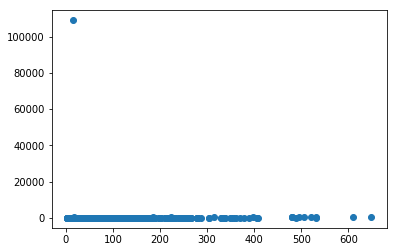

In [10]:
plt.scatter(data.newprice, data.price)  # 异常值图表展示1

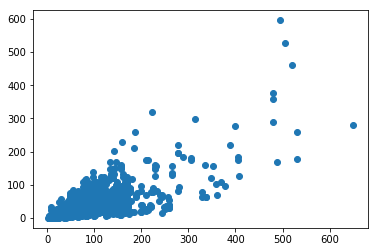

In [11]:
data = data.loc[data.price<600]
plt.scatter(data.newprice, data.price)  # 异常值图表展示2, 消除了异常值

# 相关性矩阵

,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,mileage,transferCount,seatings,displacement,newprice,anonymousFeature2,anonymousFeature3,...,cityId,carCode,country,maketype,modelyear,gearbox,oiltype,anonymousFeature11,anonymousFeature12,price
tradeTime_from_now,1.000000,0.018722,0.020190,-0.060383,0.021717,-0.019564,-0.010421,0.000946,-0.001789,0.036933,...,0.080761,-0.030471,0.154920,-0.026704,-0.051951,0.027816,0.004865,-0.031772,-0.000189,0.005733
registerDate_from_now,0.018722,1.000000,0.994268,0.703637,0.226318,-0.073622,0.227536,0.114793,0.068536,-0.058204,...,-0.012472,0.410726,-0.182162,0.132705,0.256638,-0.193704,0.015823,-0.016286,0.031451,-0.263502
licenseDate_from_now,0.020190,0.994268,1.000000,0.707356,0.219176,-0.067663,0.204095,0.086087,0.050317,-0.058189,...,-0.011551,0.412383,-0.188718,0.148422,0.252300,-0.200915,0.013507,-0.023301,0.007964,-0.284607
mileage,-0.060383,0.703637,0.707356,1.000000,0.180119,0.057402,0.252191,0.130064,0.128995,-0.039093,...,0.040259,0.257679,-0.186395,0.146291,0.165792,-0.122598,0.037390,0.027050,-0.017732,-0.178606
transferCount,0.021717,0.226318,0.219176,0.180119,1.000000,-0.021731,0.181936,0.182291,0.141129,-0.019329,...,-0.074682,0.093690,-0.006420,0.023988,0.057994,0.003146,-0.003325,0.059324,0.070581,0.052712
seatings,-0.019564,-0.073622,-0.067663,0.057402,-0.021731,1.000000,0.186778,-0.039651,0.228331,0.013717,...,0.013801,-0.045007,-0.063652,0.005379,-0.044224,-0.086251,0.017922,-0.052844,-0.011146,0.015585
displacement,-0.010421,0.227536,0.204095,0.252191,0.181936,0.186778,1.000000,0.752252,0.562382,-0.025979,...,-0.104353,0.108267,0.017784,-0.039810,0.088191,0.070913,0.048189,0.224516,0.229554,0.542969
newprice,0.000946,0.114793,0.086087,0.130064,0.182291,-0.039651,0.752252,1.000000,0.570590,-0.025226,...,-0.119492,0.048730,0.138303,-0.065629,0.057527,0.203316,0.032498,0.305320,0.235510,0.784485
anonymousFeature2,-0.001789,0.068536,0.050317,0.128995,0.141129,0.228331,0.562382,0.570590,1.000000,-0.022577,...,-0.080515,0.030430,0.007885,-0.085005,0.064818,0.091601,0.019947,0.205696,0.181852,0.469946
anonymousFeature3,0.036933,-0.058204,-0.058189,-0.039093,-0.019329,0.013717,-0.025979,-0.025226,-0.022577,1.000000,...,-0.000678,-0.030527,0.033523,0.003084,-0.027773,-0.013135,-0.005117,-0.023845,-0.011221,-0.009447


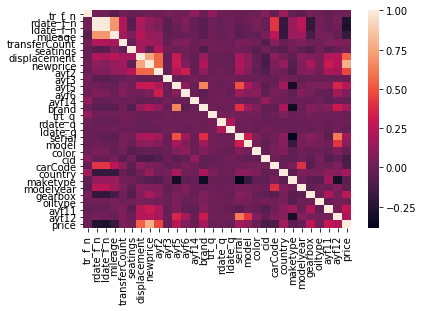

In [12]:
# 相关性矩阵
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=[my_dict[i] if i in my_dict else i for i in corr.columns.values],
            yticklabels=[my_dict[i] if i in my_dict else i for i in corr.columns.values])

corr

# 解释变量

In [13]:
# data_independent是用于预测的特征值
data_independent = data[columns_to_normalize + cate_columns]
data_independent

,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,mileage,transferCount,seatings,displacement,newprice,anonymousFeature2,anonymousFeature3,...,color,cityId,carCode,country,maketype,modelyear,gearbox,oiltype,anonymousFeature11,anonymousFeature12
0,206.0,1511.0,1455.0,4.01,0,5,1.5,6.88,1,1,...,4,4,9524,9530,9524,9541,9524,4,4,9598
1,209.0,1876.0,1766.0,8.60,0,5,1.2,11.98,2,2,...,4,5,9524,9531,9526,9541,9526,4,9594,9599
2,215.0,5102.0,5076.0,15.56,0,5,1.6,12.78,2,2,...,4,5,9525,9538,9525,9542,9527,4,9594,9600
3,205.0,1998.0,1959.0,6.04,3,5,1.3,9.49,5,2,...,4,44,9524,9530,9524,9543,9526,4,4,9601
4,204.0,3459.0,3432.0,5.70,2,5,2.0,18.08,5,2,...,32,4,9526,9531,9526,9544,9528,4,4,9602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,239.0,5467.0,5415.0,10.38,0,5,1.8,11.86,14,2,...,6,70,9525,9530,9524,9545,9529,4,4,11614
29996,596.0,3612.0,3543.0,11.69,2,5,2.0,20.28,6,2,...,5,4,9526,9531,9526,9544,9570,4,9594,9989
29997,480.0,3703.0,3639.0,9.87,0,5,1.6,14.58,2,2,...,7,4,9526,9531,9526,9549,9527,4,4,9799
29998,437.0,2120.0,2074.0,9.57,1,5,2.5,35.40,8,2,...,4,4,9524,9531,9525,9548,9574,5,9595,10300


# 集成算法

In [14]:
# 竞赛给出的模型评价标准
def valid(y, y_pred):
    """
    模型评价标准
    y: 真实值
    y_pre: 预测值
    """
    y = np.squeeze(y)
    y_pred = np.squeeze(y_pred)
    total = len(y_pred)
    ape = abs(y_pred-y)/y
    mape = ape.sum()/total
    A5 = (ape<=0.05).sum()/total
    return 0.2*(1-mape) + 0.8*A5

In [15]:
# 稳健性 10次运算
model_metrics_lists = []  # 每次迭代结果存储列表，[迭代结果表1，迭代结果表2,...,迭代结果表n]
model_lists = []  # 迭代过程中模型保存的列表，[(模型1，评价值)，(模型2，评价值)，...(模型n，评价值)]
for i in range(10):  # 十次迭代进行多个机器学习模型运算
    print('正在进行运算迭代：第{}次'.format(i + 1))
    x_train, x_test, y_train, y_test = train_test_split(data_independent.values, data['price'].values, test_size=0.25, random_state=i)
    x_std = StandardScaler()
    x_train = x_std.fit_transform(x_train)
    x_test = x_std.transform(x_test)
    y_std = StandardScaler()
    y_train = y_std.fit_transform(y_train.reshape(-1, 1))
    y_test = y_std.transform(y_test.reshape(-1, 1))
    n_folds = 5
    model_names = ['BayesianRidge', 'XGBR', 'ElasticNet', 'SVR', 'GBR', 'RFR', 'ABR', 'BR', 'KNN']
    model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
    model_xgbr = XGBRegressor(random_state=0)  # 建立XGBR对象
    model_etc = ElasticNet(random_state=0)  # 建立弹性网络回归模型对象
    model_svr = SVR(gamma='auto')  # 建立支持向量机回归模型对象
    model_gbr = GradientBoostingRegressor(random_state=0)  # 建立梯度增强回归模型对象
    model_rfr = RandomForestRegressor(n_estimators=20)  # 这里使用20个决策树
    model_abr = AdaBoostRegressor(n_estimators=20)  # 这里使用20个决策树
    model_br2 = BaggingRegressor(n_estimators=20)  # 这里使用knn
    model_knn = KNeighborsRegressor()  # 这里使用20个决策树
    model_list = [model_br, model_xgbr, model_etc, model_svr, model_gbr, model_rfr, model_abr, model_br2,
                  model_knn]  # 不同回归模型对象的集合

    pre_y_list = [model.fit(x_train, y_train).predict(x_test) for model in model_list]  # 各个回归模型预测的y值列表
    n_samples, n_features = data_independent.shape  # 总样本量，总特征数
    scores = [[cross_val_score(model, x_train, y_train, cv=n_folds,
                               scoring=make_scorer(valid, greater_is_better=True)).mean()] for model in model_list]
    model_metrics_functions = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score,
                               valid]  # 回归评估指标对象之集
    model_metrics_list = np.hstack((np.array([[m(y_std.inverse_transform(y_test.reshape(-1, 1)),
                                                 y_std.inverse_transform(pre_y_list[i].reshape(-1, 1))) for m in
                                               model_metrics_functions] for i in range(len(pre_y_list))]),
                                    np.array(scores)))
    model_metrics_lists.append(model_metrics_list)
    regression_score = pd.DataFrame(model_metrics_list, index=model_names, columns=['explained_var', 'mae', 'mse', 'r2', 'valid', 'valid_cv'])  # 建立回归指标的数据框
    model_lists.append((model_list, regression_score['valid'].values.tolist()))

正在进行运算迭代：第1次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

正在进行运算迭代：第2次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

正在进行运算迭代：第3次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

正在进行运算迭代：第4次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

正在进行运算迭代：第5次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

正在进行运算迭代：第6次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

正在进行运算迭代：第7次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

正在进行运算迭代：第8次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

正在进行运算迭代：第9次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

正在进行运算迭代：第10次


C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\JS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\JS\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1

In [18]:
# 10次运算的平均值, 展示运算结果表
model_metrics_list = sum(model_metrics_lists)/10
regression_score = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev_m', 'mae_m', 'mse_m', 'r2_m', 'valid_m', 'valid_cv_m']) #建立回归指标的数据框
print('all samples: %d \t features: %d' % (n_samples, n_features), '\n', '-'*60)
print('\n', 'regression metrics:', '\n', '-'*60)
print(regression_score)
print('='*100)

all samples: 29997 	 features: 29 
 ------------------------------------------------------------

 regression metrics: 
 ------------------------------------------------------------
                   ev_m     mae_m       mse_m      r2_m   valid_m  valid_cv_m
BayesianRidge  0.753852  3.875893   59.025870  0.753813  0.200143    0.780621
XGBR           0.958940  1.189331   10.106541  0.958936  0.491122    0.762974
ElasticNet     0.264196  7.609627  176.357218  0.263938  0.024699    0.764214
SVR            0.781215  1.799759   56.313805  0.780941  0.390329    0.751137
GBR            0.942239  1.715430   13.910284  0.942230  0.378648    0.779693
RFR            0.949475  1.185426   12.434126  0.949467  0.524286    0.767045
ABR            0.752527  5.957754   66.664172  0.711162  0.059604    0.758293
BR             0.951882  1.181634   11.899197  0.951875  0.524815    0.770730
KNN            0.851627  2.886528   35.821303  0.851507  0.288873    0.731852


# 最佳模型选择

In [19]:
for idx, i in enumerate(model_lists):
    print("model_{}:{}".format(idx, i[1]))

model_0:[0.1970672565422297, 0.4846562070115874, 0.02037376756975758, 0.381768900574422, 0.37354269611879715, 0.5181130152976798, 0.0668408662600634, 0.5256667041609175, 0.2777261499427884]
model_1:[0.20797645182657037, 0.5015847705022668, 0.02640309563509357, 0.4009346384527399, 0.3848836812827691, 0.5249433729926892, 0.10199166997329158, 0.530903543811538, 0.2948032136361547]
model_2:[0.20499923441807447, 0.48611282934354977, 0.016773774184100212, 0.3796827482558991, 0.3731208264883613, 0.5151541756442064, 0.03674065460177775, 0.5186262271021815, 0.2840466354291889]
model_3:[0.1986924736804277, 0.48896380605232653, 0.030414409474853285, 0.39587861202133684, 0.3794914323684143, 0.5224097558282009, 0.053456395443790064, 0.5227823104919613, 0.2926786651298783]
model_4:[0.2031525335214172, 0.49477173004538166, 0.02649289539520598, 0.3916793466869204, 0.38606607713117025, 0.5305593091276093, 0.0094190611609545, 0.5284073256417122, 0.2938082142050069]
model_5:[0.1954658076973224, 0.4836780

In [20]:
model_xgbr_best = model_lists[1][0][1]
model_xgbr_best

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [21]:
model_rfr_best = model_lists[4][0][-4]
model_rfr_best

RandomForestRegressor(n_estimators=20)

In [22]:
model_br2_best = model_lists[1][0][-2]
model_br2_best

BaggingRegressor(n_estimators=20)

In [23]:
# 构建集成模型
select_models = [model_xgbr_best, model_rfr_best, model_br2_best]
pred_ls = []
for m in select_models:
    pred_ls.append(y_std.inverse_transform(m.predict(x_test).reshape(-1, 1)))
predict = sum(pred_ls)/len(pred_ls)
predict

array([[33.37764776],
       [17.37468151],
       [47.68132592],
       ...,
       [ 3.40897103],
       [14.0495093 ],
       [14.21840742]])

# 集成模型在测试集上效果

In [24]:
print("集成模型评价值valid：", valid(y=y_std.inverse_transform(y_test), y_pred=predict))

集成模型评价值valid： 0.6324232478296714


In [40]:
# 数据加载
x_train,x_test,y_train,y_test = train_test_split(data_independent.values,data['price'].values,test_size=0.2)  
x_std = StandardScaler()  
x_train = x_std.fit_transform(x_train)
x_test = x_std.transform(x_test)
y_std = StandardScaler()
y_train = y_std.fit_transform(y_train.reshape(-1, 1))
y_test = y_std.transform(y_test.reshape(-1, 1))

In [41]:
# 真实值和预测值
select_models = [model_xgbr_best, model_rfr_best, model_br2_best]
pred_ls = []
for m in select_models:
    pred_ls.append(y_std.inverse_transform(m.predict(x_test).reshape(-1, 1)))
predict = sum(pred_ls)/len(pred_ls)
y_ture = y_std.inverse_transform(y_test)
y_predict = np.squeeze(predict)
y_ture = np.squeeze(y_std.inverse_transform(y_test))

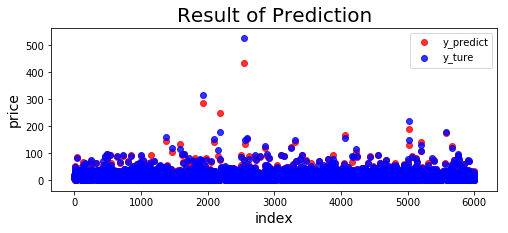

In [42]:
# 准确率
plt.figure(figsize=(8,3))
for idx, i in enumerate(y_predict):
    s1 = plt.scatter(idx,i, c='r', alpha=0.8)
for idx, i in enumerate(y_ture):
    s2 = plt.scatter(idx,i, c='b', alpha=0.8)
plt.xlabel('index',size=14) 
plt.ylabel('price',size=14) 
plt.title('Result of Prediction',size=20) 
plt.legend((s1,s2),('y_predict','y_ture') ,loc = 'best')
plt.show()

# 模型保存

In [43]:
pickle.dump(model_xgbr_best, open('./model/model_xgbr_best.pkl', 'wb'))
pickle.dump(model_rfr_best, open('./model/model_rfr_best.pkl', 'wb'))
pickle.dump(model_br2_best, open('./model/model_br2_best.pkl', 'wb'))

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus 

# 特征重要性

## 随机森林获取特征重要性

In [45]:
# 模型加载
model_xgbr_best = pickle.load(open('./model/model_xgbr_best.pkl', 'rb'))
model_rfr_best = pickle.load(open('./model/model_rfr_best.pkl', 'rb'))
model_br2_best = pickle.load(open('./model/model_br2_best.pkl', 'rb'))

In [46]:
# 数据读取
x_train,x_test,y_train,y_test = train_test_split(data_independent.values,data['price'].values,test_size=0.2)  
x_std = StandardScaler()  
x_train = x_std.fit_transform(x_train)
x_test = x_std.transform(x_test)
y_std = StandardScaler()
y_train = y_std.fit_transform(y_train.reshape(-1, 1))
y_test = y_std.transform(y_test.reshape(-1, 1))

In [47]:
# 特征重要性
importances = list(model_rfr_best.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data_independent.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: newprice             Importance: 0.69
Variable: licenseDate_from_now Importance: 0.14
Variable: registerDate_from_now Importance: 0.09
Variable: mileage              Importance: 0.01
Variable: displacement         Importance: 0.01
Variable: brand                Importance: 0.01
Variable: serial               Importance: 0.01
Variable: anonymousFeature12   Importance: 0.01
Variable: tradeTime_from_now   Importance: 0.0
Variable: transferCount        Importance: 0.0
Variable: seatings             Importance: 0.0
Variable: anonymousFeature2    Importance: 0.0
Variable: anonymousFeature3    Importance: 0.0
Variable: anonymousFeature5    Importance: 0.0
Variable: anonymousFeature6    Importance: 0.0
Variable: anonymousFeature14   Importance: 0.0
Variable: tradeTime_q          Importance: 0.0
Variable: registerDate_q       Importance: 0.0
Variable: licenseDate_q        Importance: 0.0
Variable: model                Importance: 0.0
Variable: color                Importance: 0.0
Vari

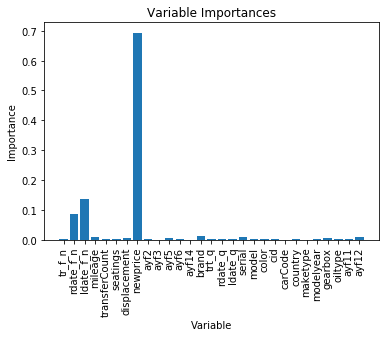

In [48]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, [my_dict[i] if i in my_dict else i for i in data_columns], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

## XGBR获取特征重要性

In [49]:
# 特征重要性
importances = list(model_xgbr_best.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data_independent.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: newprice             Importance: 0.41999998688697815
Variable: licenseDate_from_now Importance: 0.20999999344348907
Variable: registerDate_from_now Importance: 0.11999999731779099
Variable: brand                Importance: 0.03999999910593033
Variable: anonymousFeature12   Importance: 0.029999999329447746
Variable: mileage              Importance: 0.019999999552965164
Variable: anonymousFeature2    Importance: 0.019999999552965164
Variable: anonymousFeature5    Importance: 0.019999999552965164
Variable: maketype             Importance: 0.019999999552965164
Variable: oiltype              Importance: 0.019999999552965164
Variable: seatings             Importance: 0.009999999776482582
Variable: displacement         Importance: 0.009999999776482582
Variable: serial               Importance: 0.009999999776482582
Variable: model                Importance: 0.009999999776482582
Variable: country              Importance: 0.009999999776482582
Variable: modelyear            Importance: 

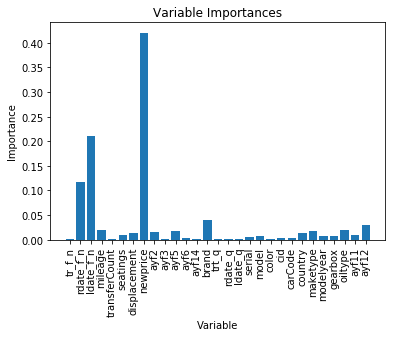

In [50]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, [my_dict[i] if i in my_dict else i for i in data_columns], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

# 进行预测

In [51]:
df2 = pickle.load(open('./data/df2.pkl', 'rb'))
df2

,index,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,...,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,anonymousFeature7_from_now,anonymousFeature15_from_now,tradeTime_q,registerDate_q,licenseDate_q,anonymousFeature7_q,anonymousFeature13_m
0,0,3,2021-09-26,3,3,3,6.64,2,3,1,...,116.0,1421.0,1249.0,NaN,NaN,3,1,3,4.0,10.0
1,1,4,2021-08-14,4,4,4,8.04,3,1,2,...,159.0,3367.0,3197.0,1316.0,NaN,3,4,2,2.0,10.0
2,2,8,2021-10-09,8,8,8,10.19,5,1,2,...,103.0,3459.0,3417.0,NaN,NaN,4,3,3,4.0,3.0
3,3,9,2021-09-30,9,9,9,2.27,2,2,4,...,112.0,781.0,611.0,NaN,NaN,3,4,2,3.0,7.0
4,4,11,2021-08-09,8,11,11,7.03,2,3,1,...,164.0,1176.0,1049.0,NaN,NaN,3,4,1,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,55510,2021-10-28,12,275,1023,8.53,1,1,1,...,84.0,1725.0,1689.0,159.0,NaN,4,2,2,3.0,2.0
4996,4996,1768,2021-08-23,17,480,1400,11.11,1,19,2,...,150.0,2729.0,2653.0,NaN,NaN,3,3,4,4.0,9.0
4997,4997,20723,2021-09-03,7,166,1056,11.02,2,1,2,...,139.0,4098.0,4046.0,2290.0,NaN,3,4,4,4.0,11.0
4998,4998,15625,2021-10-29,25,235,371,6.21,4,5,1,...,83.0,2180.0,2043.0,NaN,NaN,4,1,2,4.0,4.0


In [52]:
# 分类变量cate_columns2，数值型变量columns_to_normalize2
columns_to_normalize2 = ['tradeTime_from_now', 'registerDate_from_now', 'licenseDate_from_now', 'mileage', 'transferCount', 'seatings', 'displacement', 'newprice', 'anonymousFeature2', 'anonymousFeature3', 'anonymousFeature5', 'anonymousFeature6', 'anonymousFeature14']
cate_columns2 = ['brand','tradeTime_q', 'registerDate_q', 'licenseDate_q', 'serial', 'model', 'color', 'cityId', 'carCode','country', 'maketype', 'modelyear', 'gearbox','oiltype', 'anonymousFeature11', 'anonymousFeature12']
data_columns2 = []
data_columns2.extend(columns_to_normalize2)
data_columns2.extend(cate_columns2)
data2 = df2[data_columns2]

# 将分类变量进行编码，转换为数值
convert_to_num = pickle.load(open('./convert_to_num.pkl', 'rb'))
data2[cate_columns2] = data2[cate_columns2].apply(convert_to_num.transform)

# data_independent2是用于预测的特征值
data_independent2 = data2[columns_to_normalize2 + cate_columns2]
x = x_std.transform(data_independent2.values)

D:\Users\JS\Anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
select_models2 = [model_xgbr_best, model_rfr_best, model_br2_best]
pred_ls = []
for m in select_models2:
    pred_ls.append(y_std.inverse_transform(m.predict(x).reshape(-1, 1)))
predict = sum(pred_ls)/len(pred_ls)
predict

array([[15.08244561],
       [ 9.70776209],
       [ 2.16065918],
       ...,
       [ 6.36772894],
       [ 2.52313124],
       [11.52536132]])

In [55]:
# 预测结果表
result = pd.DataFrame(np.hstack((np.hstack((x_std.inverse_transform(x), predict)), df2.carid.values[:, np.newaxis])), columns=data_columns2+['price', 'carid'])
result

,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,mileage,transferCount,seatings,displacement,newprice,anonymousFeature2,anonymousFeature3,...,carCode,country,maketype,modelyear,gearbox,oiltype,anonymousFeature11,anonymousFeature12,price,carid
0,116,1421,1249,6.64,0,7,2,25.98,3,2,...,4,9533,9526,9547,44,4,9594,9953,15.0824,3
1,159,3367,3197,8.04,2,4,1.6,26.9,4,2,...,5,9538,9525,9554,44,4,9594,10694,9.70776,4
2,103,3459,3417,10.19,0,5,1.6,7.58,2,2,...,5,9532,9526,9556,7,4,9594,10507,2.16066,8
3,112,781,611,2.27,0,5,1.5,8.2,5,2,...,32,9530,9524,9550,8,4,9594,10140,5.27092,9
4,164,1176,1049,7.03,0,5,2,21.79,6,2,...,4,9532,9526,9550,8,4,9594,10178,14.7662,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,84,1725,1689,8.53,1,7,2.4,26.68,12,2,...,4,9531,9526,9541,22,4,9594,9960,19.187,55510
4996,150,2729,2653,11.11,0,5,1.5,20.98,2,2,...,5,9531,9525,9551,9,5,9595,10050,8.07356,1768
4997,139,4098,4046,11.02,1,5,2.5,22.48,6,2,...,5,9531,9526,9542,6,4,4,9736,6.36773,20723
4998,83,2180,2043,6.21,0,5,1.5,5.99,1,2,...,4,9530,9524,9543,7,4,4,9750,2.52313,15625


In [56]:
# 数据处理进行输出
result[cate_columns2] = result[cate_columns2].apply(convert_to_num.inverse_transform)
result

,tradeTime_from_now,registerDate_from_now,licenseDate_from_now,mileage,transferCount,seatings,displacement,newprice,anonymousFeature2,anonymousFeature3,...,carCode,country,maketype,modelyear,gearbox,oiltype,anonymousFeature11,anonymousFeature12,price,carid
0,116,1421,1249,6.64,0,7,2,25.98,3,2,...,1,779416.0,2.0,2018.0,3,1,1+2,4878*1925*1734,15.0824,3
1,159,3367,3197,8.04,2,4,1.6,26.9,4,2,...,2,779411.0,3.0,2011.0,3,1,1+2,3723*1683*1407,9.70776,4
2,103,3459,3417,10.19,0,5,1.6,7.58,2,2,...,2,779412.0,2.0,2007.0,6,1,1+2,4415*1674*1415,2.16066,8
3,112,781,611,2.27,0,5,1.5,8.2,5,2,...,4,779413.0,1.0,2019.0,7,1,1+2,4649*1830*1705,5.27092,9
4,164,1176,1049,7.03,0,5,2,21.79,6,2,...,1,779412.0,2.0,2019.0,7,1,1+2,4933*1836*1469,14.7662,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,84,1725,1689,8.53,1,7,2.4,26.68,12,2,...,1,779415.0,2.0,2017.0,11,1,1+2,4845*1805*1695,19.187,55510
4996,150,2729,2653,11.11,0,5,1.5,20.98,2,2,...,2,779415.0,3.0,2014.0,10,2,3+2,4740*1770*1480,8.07356,1768
4997,139,4098,4046,11.02,1,5,2.5,22.48,6,2,...,2,779415.0,2.0,2008.0,5,1,1,4850*1795*1475,6.36773,20723
4998,83,2180,2043,6.21,0,5,1.5,5.99,1,2,...,1,779413.0,1.0,2016.0,6,1,1,4100*1740*1635,2.52313,15625


In [57]:
result[['carid', 'price']].to_csv('./data/附件3：估价模型结果.txt', sep='\t', index=False, header=None)